# Traffic Analysis Milestone Report

## Problem Statement

Can we target the roads on which fatal accidents are most likely to occur? How often is weather a factor (cloudy, foggy, raining, snowing, icy roads, etc.)? Are they more likely to occur at a particular time of day and/or year or on a particular type of road (for example, interstate or rural)?  On the other hand, are human factors such as impairment due to drugs, alcohol or even distraction greater factors than the foregoing environmental factors?  

The first question is therefore whether the chosen environmental factors have a greater or lesser impact than human impairment.  If human impairment is the greater factor, is it more likely to be due to drugs/alcohol or to some other factor?  Finally, regardless of the role of human impairment, when (time of day/season/weather conditions) and where (types of roads and general regions of a community) are traffic fatalities most likely to occur?  

### The Client

This topic would be of interest to law enforcement agencies, as they can make the best choices in deploying resources in those areas and at those times preemptively (i.e., putting speed traps or DUI checkpoints in those areas and shortly before those times when traffic fatalities are likely to occur in an attempt to encourage safe driving behavior) and to ensure that resources are available to quickly respond at those times.  (It would also be of interest to auto insurance companies of individuals that live in those types of areas in setting their rates.)  Additionally, if human factors are more to blame, law enforcement may be able to plan the appropriate educational outreach programs to focus more on issues such as driving while impaired or distracted.  

### The Data

The dataset was taken from the 2015 Traffic Fatalities provided by the National Highway Traffic Safety Administration (NHTSA) available [here](https://www.kaggle.com/nhtsa/2015-traffic-fatalities).  This consists of 17 related csv files which contain in common unique case identifiers.  The accompanying NHTSA documentation defines the meanings of the codes and abbreviations used throughout each dataset.  

### The Approach

1. Data wrangling and cleaning—First I determined which among the 17 datasets are the most useful.  After choosing the most important/useful datasets, each were cleaned, with some variables converted into binary variables as needed, and then ultimately united into a single dataset.  
2. Exploratory Data Analysis—Here, I analyzed the variables in the dataset using both statistical functions and graphical analyses to obtain an overall picture of the data and to determine which factors were most important in causing serious traffic fatalities.  I was then able to determine whether human or environmental factors played a greater role.  
3. Machine Learning—After performing an analysis of the key variables, I will then build a model using the appropriate variables in order to predict when and where a traffic fatality is most likely to occur.  Approximately 80% of the data will be used in training the model, while the remaining 20% will be used to test the model’s accuracy.  
4. Final Report—I will then provide a detailed report describing the procedure I used and the findings I obtained therefrom, including appropriate data visualizations along with a slide deck providing a high level summary of the report.

Thus far, I have completed the data cleaning and statistical analysis, the results of which are reported below. These results shall then be harnessed for the purposes of applying machine learning and finalizing my complete analysis of the problem described above.  

## Data Cleaning the Traffic Datasets

I obtained the data from the 2015 Traffic Fatalities provided by NHTSA available __[here](https://www.kaggle.com/nhtsa/2015-traffic-fatalities)__, which consisted of 17 related csv files containing common unique case identifiers.  The accompanying NHTSA documentation defines the meanings of the codes and abbreviations used throughout each dataset.  

Note:  Relevant portions from this report are interspersed throughout the code below for context.

Although I did not use all 17 datasets, most of them were used and loaded using pd.read_csv(). The goal was to use data that could demonstrate what factors were most important in fatal accidents, i.e., environmental factors versus human elements, as well as to choose those factors that might be useful in predicting whether a “serious” fatality would occur (greater than 1 fatality in a given accident).  

I began by merging the datasets chosen using the merge function in pandas. The datasets used were Accident, Vehicle, Person, Distract, Drimpair, Factor, Maneuver, Violatn and Vision.  The first two are the principal datasets, containing the primary references to the keys ST_CASE and VEH_NO, and were merged first.  First Vehicle was merged to Accident on ST_CASE into a new dataframe called __traffic__.  Person was then merged to traffic on ST_CASE and VEH_NO. The remaining datasets were placed into a list (to_merge = [distract, dr_impair, factor, maneuver, violation, vision]) and then merged to __traffic__ via a for loop on ST_CASE and VEH_NO.  All merges were left merges, except for the Person merge, which was an inner merge necessary to get rid of NA values after merge resulting from no values for certain rare person types such as pedestrians.  (When doing machine learning, the person type will likely be restricted to only drivers, but all data is being kept for illustrative/statistical analysis purposes for now.)  

After the merge I checked for missing data using traffic.info(), and no data was missing (these were fairly clean datasets to begin with). I then checked for outliers using traffic.describe().  The only apparent large differences between mean and median were in the last six columns, likely due to the number of unknowns being represented by 99. 
Therefore numerical outliers appear to only be an issue for columns with numerical, rather than categorical data (usually mixed with codes for “Unknown”-type values.)  The majority of the columns are categorical, but a few are numerical. I checked for outliers in the numerical columns using value_counts (traffic.loc[:, ['TRAV_SP', 'FATALS', 'DRUNK_DR', 'VSPD_LIM', 'DEATHS', 'AGE']].apply(pd.Series.value_counts)).  TRAV_SP (the travel speed), VSPD_LIM (speed limit) and AGE all contained inordinately large values that were actually codes for Unknown-type values (999, 998, etc).  These were converted to zero in the first two. In AGE, zero indicated infants, so the zeroes here were first converted to 1 (one-year old babies), so as not to confuse these with the unknowns to be converted to zero.  

Finally, in the interest of performing machine learning later, I created a number of columns that were binary equivalents of existing columns for simplicity (for example, whether or not there was a visual obstruction, rather than displaying all possible types of visual obstruction).  All binary equivalent columns were prefaced with the “BIN\_” prefix.  However, the original columns were also kept for illustrative/statistical analysis purposes where the greater level of detail may be preferred.   

The final column created was SERIOUS_FATALS.  This column was based on the FATALS column where FATALS (number of fatalities in a given accident) was greater than 1.  This variable is the one that I intend to use as the variable to be predicted when applying machine learning. 

## Statistical Analysis of the Traffic Datasets

I began by loading the previously cleaned and consolidated dataset "traffic_clean.csv" as the dataframe **traffic_clean**, and briefly reviewing its statistical characteristics via describe().  


### Initial Analysis

Aside from a few variables, very little useful information could be obtained by this method, as nearly all of the variables are categorical variables, each item of numerical data actually standing as a key for a particular qualitative piece of information.  For example, under the variable MDRDSTRD (indicating whether the driver was distracted), the number 3 indicates that the driver was distracted by a fellow vehicle occupant.  These detailed translations of numerical keys to qualitative data are given in the **Fatality Analysis Reporting System (FARS) Analytical User’s Manual** for 1975-2015 published by the National Highway Traffic Safety Administration (NHTSA). I have included relevant excerpts from this manual in the displays under the histograms below.  

Here, I chose to interpret the ordinal variables of MONTH, DAY_WEEK and HOUR as numerical variables since the numerical distance between each of these categories is equal (1 month, 1 weekday, 1 hour). (*See*, [here](https://www.theanalysisfactor.com/pros-and-cons-of-treating-ordinal-variables-as-nominal-or-continuous/), regarding the statistical interpretation of ordinal variables.) It appears that the mean and median month in which fatal accidents occur is July.  This is also the most frequently occurring month.  The mean MONTH is 6.773911 and the median is 7. The mean and median day of the week on which fatal accidents occur appears to be Wednesday.  The mean DAY_WEEK is 4.124882 and the median is 4, and since the first day of the week is Sunday as this variable is defined, 4 translates to Wednesday.  However, the most commonly occurring day of the week is 7, Saturday. This makes sense, as one might imagine that greater numbers of people may be out drinking heavily on a day like Saturday, and such drinking may contribute to causing fatal accidents. The mean and median HOUR is somewhere between 1pm and 2pm (13.03 and 14, respectively, even after removing the 99 (unknown) label value from the calculation). However, the most frequently occurring hour is 17, or 5pm, the beginning of rush hour. Finally, the most common area type for fatal accidents to occur was in rural areas (RUR_URB = 1).  

### Fatal Accident Analysis

I then ran counts for the numbers of fatalities per accident.  The most common number of deaths in fatal accidents in 2015 was 1 at 69,811.  I also ran counts for the numbers of what I defined as "serious fatalities" using the new SERIOUS_FATALS variable created during the data cleaning process. I defined these "serious fatalties" as accidents in which the number of fatalties was greater than 1.  The total number of serious fatalities was 9,808 with the most common number of deaths per accident being 2.  12.32% of the fatal accidents in 2015 were  serious fatalities.  

### Human vs. Environmental Causes of Serious Fatalities

In an effort to determine the share of human-related causes compared to environmental causes of serious fatalities, I chose to examine several human-related and environment-related variables.  The variables relating to human causes were DRUNK_DR (the number of drunk drivers in a fatal accident), DRUGS (whether or not drug use was involved in the accident), TRAV_SP (the travel speed of the vehicle, filtered for where the vehicle's speed was greater than the posted speed limit (TRAV_SP > VSPD_LIM)), MDRDSTRD (characterizing any distractions that may have led to the accident), and MVIOLATN (any violations of motor vehicle law that were charged in relation to the accident). The variables relating to environmental causes were WEATHER (weather conditions at the time of the accident), VSURCOND (the road condition at the time of the accident) and LGT_COND (the lighting conditions at the time of the accident).  

#### Human Factors

The total number of drunk drivers involved in serious fatalities was 3,136. Drunk drivers were involved in 31.97% of serious fatalities.  There was usually only 1 drunk driver involved.  Occasionally there were 2 (243 accidents), but never more than 3 drunk drivers involved (7 accidents).  

The total number of drug users involved in serious fatalities was 450.  Drug users were involved in 13.23% of serious fatalities.  

As can be observed from the histogram, the majority of the posted speed limits were highway speeds (approximately 60 m.p.h.) and most of the travel speeds were contained within this limit.  The number of accidents involving excess speed (over the posted limit) was 1,360 and accounted for 13.87% of serious fatalities. The average excess speed was  71 m.p.h.  The average amount by which the speed was in excess of the posted limit was  21 m.p.h.

The total number of accidents involving distracted drivers was 690 and accounted for 7.04% of serious fatalities. The most common distraction appeared to be general inattention, but the most common specific types of distractions were those resulting from other vehicle occupants (73/690 = 10.58% of distracted drivers) and from cell phone-related distractions (37/690 = 5.36% of distracted drivers).  

The total number of accidents in which drivers were charged with violations of motor vehicle law was 993 and accounted for just 10.12% of serious fatalities.  However, in order to avoid double counting of impairment-related and speed-related causes already discussed, I excluded these types of offenses and ran another count for other types of violations. The total number of accidents in which drivers were charged with non-impairment-related and non-speed-related violations of motor vehcile law was 676 and accounted for 6.89% of serious fatalities. The most common violation charged appeared to be Manslaughter or Homicide. Ironically, there did not appear to be many instances where charges were filed in accidents involving serious fatalities in 2015.  No charges were filed in 8,443 cases. Perhaps by filing charges where appropriate more frequently, it could serve as a deterrent to driver behaviors that lead to serious fatalities in the future. 

#### Environmental Factors

The total number of accidents in which adverse weather conditions were involved was 2,759 and accounted for 28.13% of serious fatalities, where the most common type of adverse weather was cloudiness.  However, in most accidents involving serious fatalities the weather was clear (in 6,974 instances), which initially suggests that more often than not human agency (or lack thereof) is to blame for the accident.  

The total number of accidents in which adverse road conditions were involved was 1,653 and accounted for 16.85% of serious fatalities, where the most common type of adverse road condition was wetness. However, just as with weather conditions discussed above, the majority of serious fatalities (8,027 instances) involved dry road conditions. This again suggests that human agency may be more at fault than environmental factors in causing serious fatalities.  

The total number of accidents in which adverse lighting conditions were involved was 3,235 and accounted for 32.98% of serious fatalities, where the most common type of adverse lighting condition was darkness with no or inadequate lighting.  Again, however, there were daylight conditions in most serious fatalities (5,234 instances).  

### Conclusions and Summary

In order to truly get a sense of the degree to which human-related causes or environmental causes were more at fault in serious fatalities, I filtered the SERIOUS_FATALS variable for human-related factors with affirmative (causative) conditions, as done for the analyses of these variables given above, and environmental variables with favorable conditions (clear skies, dry roads, daylight or well-lit conditions). I used the foregoing filtering followed by a count to create a new variable called **human_not_env**. I then performed the same filtering, but without specifying conditions for the environmental variable, to create a second variable called **mixed_causes**.  I then obtained the proportion of solely human-caused accidents by dividing **human_not_env** by the total number of SERIOUS_FATALS. To obtain the proportion of causes solely due to environmental factors, I subtracted **mixed_causes** from the total_number of SERIOUS_FATALS and divided by the total_number of SERIOUS_FATALS. Finally, to obtain the proportion of causes due a combination of human and environmental causes, I subtracted **human_not_env** from **mixed_causes** (since the exclusive case was subsumed within this variable) to get the number of mixed causes and divided by the total_number of SERIOUS_FATALS. The results were as follows:

Proportion of Solely Human-Caused Serious Fatalities: 35.59 % 

Proportion of Solely Environment-Related Serious Fatalities: 20.58 %

Proportion of Combined Human and Environment-Caused Serious Fatalities: 43.83 %

Thus, it appears that in the majority of cases there is a shared combination of human and environment-related causes acting simultaneously to bring about serious fatalities, but where only one or the other factor is solely present, human-related factors are more often than not to blame. These ideas will be further put to the test in my Machine Learning Analysis report. 


## Report Excerpts

# Data Cleaning the Traffic Datasets

I obtained the data from the 2015 Traffic Fatalities provided by NHTSA available __[here](https://www.kaggle.com/nhtsa/2015-traffic-fatalities)__.  This consists of 17 related csv files which contain in common unique case identifiers.  The accompanying NHTSA documentation defines the meanings of the codes and abbreviations used throughout each dataset.  

Although I did not use all 17 datasets, most of them were used and loaded using pd.read_csv().  The goal was to use data that could demonstrate what factors were most important in fatal accidents, i.e., environmental factors versus human elements, as well as to choose those factors that might be useful in predicting whether a “serious” fatality would occur (greater than 1 fatality in a given accident).  


In [1]:
import numpy as np
import pandas as pd

#Import accident dataset
accident = pd.read_csv("accident.csv")
accident.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


In [2]:
#Choosing appropriate columns for accident
accident = accident[['ST_CASE', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'RUR_URB', 'ROUTE', 'RELJCT1',
       'RELJCT2', 'WRK_ZONE', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER',
       'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR']]

#Checking for null values/incomplete columns
accident.info()
accident.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 19 columns):
ST_CASE     32166 non-null int64
MONTH       32166 non-null int64
YEAR        32166 non-null int64
DAY_WEEK    32166 non-null int64
HOUR        32166 non-null int64
RUR_URB     32166 non-null int64
ROUTE       32166 non-null int64
RELJCT1     32166 non-null int64
RELJCT2     32166 non-null int64
WRK_ZONE    32166 non-null int64
LGT_COND    32166 non-null int64
WEATHER1    32166 non-null int64
WEATHER2    32166 non-null int64
WEATHER     32166 non-null int64
CF1         32166 non-null int64
CF2         32166 non-null int64
CF3         32166 non-null int64
FATALS      32166 non-null int64
DRUNK_DR    32166 non-null int64
dtypes: int64(19)
memory usage: 4.7 MB


,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,LGT_COND,WEATHER1,WEATHER2,WEATHER,CF1,CF2,CF3,FATALS,DRUNK_DR
0,10001,1,2015,5,2,1,3,0,1,0,2,1,0,1,0,0,0,1,1
1,10002,1,2015,5,22,1,1,0,1,0,2,10,0,10,0,0,0,1,0
2,10003,1,2015,5,1,1,2,0,1,0,2,1,0,1,0,0,0,1,1
3,10004,1,2015,1,0,1,3,0,1,0,2,10,0,10,0,0,0,1,1
4,10005,1,2015,4,7,2,2,0,2,0,1,1,0,1,0,0,0,1,0


In [3]:
#Import vehicle dataframe and choosing appropriate columns
vehicle = pd.read_csv("vehicle.csv", encoding = "ISO-8859-1")
vehicle = vehicle[['ST_CASE', 'VEH_NO', 'HAZ_INV', 'TRAV_SP',
       'SPEEDREL', 'VSPD_LIM', 'VPROFILE', 'VPAVETYP', 'VSURCOND', 'VTRAFCON',
       'VTCONT_F', 'DEATHS']]

vehicle.info()
vehicle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48923 entries, 0 to 48922
Data columns (total 12 columns):
ST_CASE     48923 non-null int64
VEH_NO      48923 non-null int64
HAZ_INV     48923 non-null int64
TRAV_SP     48923 non-null int64
SPEEDREL    48923 non-null int64
VSPD_LIM    48923 non-null int64
VPROFILE    48923 non-null int64
VPAVETYP    48923 non-null int64
VSURCOND    48923 non-null int64
VTRAFCON    48923 non-null int64
VTCONT_F    48923 non-null int64
DEATHS      48923 non-null int64
dtypes: int64(12)
memory usage: 4.5 MB


,ST_CASE,VEH_NO,HAZ_INV,TRAV_SP,SPEEDREL,VSPD_LIM,VPROFILE,VPAVETYP,VSURCOND,VTRAFCON,VTCONT_F,DEATHS
0,10001,1,1,55,0,55,1,2,1,0,0,1
1,10002,1,1,70,4,70,1,2,2,0,0,1
2,10003,1,1,80,0,55,1,2,1,0,0,1
3,10004,1,1,75,0,55,1,2,1,0,0,1
4,10005,1,1,15,0,65,6,2,1,0,0,1


In [4]:
#Import person dataset and choose appropriate columns
person = pd.read_csv("person.csv")
person = person[['ST_CASE', 'VEH_NO', 'PER_NO', 'AGE', 'PER_TYP', 'INJ_SEV', 'REST_USE', 
                 'REST_MIS','DRUGS', 'P_SF1', 'P_SF2', 'P_SF3']]
person.info()
person.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80587 entries, 0 to 80586
Data columns (total 12 columns):
ST_CASE     80587 non-null int64
VEH_NO      80587 non-null int64
PER_NO      80587 non-null int64
AGE         80587 non-null int64
PER_TYP     80587 non-null int64
INJ_SEV     80587 non-null int64
REST_USE    80587 non-null int64
REST_MIS    80587 non-null int64
DRUGS       80587 non-null int64
P_SF1       80587 non-null int64
P_SF2       80587 non-null int64
P_SF3       80587 non-null int64
dtypes: int64(12)
memory usage: 7.4 MB


,ST_CASE,VEH_NO,PER_NO,AGE,PER_TYP,INJ_SEV,REST_USE,REST_MIS,DRUGS,P_SF1,P_SF2,P_SF3
0,10001,1,1,68,1,4,7,0,9,0,0,0
1,10002,1,1,49,1,4,7,0,0,0,0,0
2,10003,1,1,31,1,4,7,0,9,0,0,0
3,10003,1,2,20,2,2,7,0,8,0,0,0
4,10004,1,1,40,1,4,7,0,9,0,0,0


I began by merging the datasets chosen using the merge function in pandas. The datasets used were Accident, Vehicle, Person, Distract, Drimpair, Factor, Maneuver, Violatn and Vision.  The first two are the principal datasets, containing the primary references to the keys ST_CASE and VEH_NO, and were merged first.  First Vehicle was merged to Accident on ST_CASE into a new dataframe called __traffic__.  

In [5]:
#First merge:  accident and vehicle on ST_CASE
traffic = accident.merge(vehicle, on="ST_CASE", how="left")
traffic.info()
traffic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48923 entries, 0 to 48922
Data columns (total 30 columns):
ST_CASE     48923 non-null int64
MONTH       48923 non-null int64
YEAR        48923 non-null int64
DAY_WEEK    48923 non-null int64
HOUR        48923 non-null int64
RUR_URB     48923 non-null int64
ROUTE       48923 non-null int64
RELJCT1     48923 non-null int64
RELJCT2     48923 non-null int64
WRK_ZONE    48923 non-null int64
LGT_COND    48923 non-null int64
WEATHER1    48923 non-null int64
WEATHER2    48923 non-null int64
WEATHER     48923 non-null int64
CF1         48923 non-null int64
CF2         48923 non-null int64
CF3         48923 non-null int64
FATALS      48923 non-null int64
DRUNK_DR    48923 non-null int64
VEH_NO      48923 non-null int64
HAZ_INV     48923 non-null int64
TRAV_SP     48923 non-null int64
SPEEDREL    48923 non-null int64
VSPD_LIM    48923 non-null int64
VPROFILE    48923 non-null int64
VPAVETYP    48923 non-null int64
VSURCOND    48923 non-null int64


,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,HAZ_INV,TRAV_SP,SPEEDREL,VSPD_LIM,VPROFILE,VPAVETYP,VSURCOND,VTRAFCON,VTCONT_F,DEATHS
0,10001,1,2015,5,2,1,3,0,1,0,...,1,55,0,55,1,2,1,0,0,1
1,10002,1,2015,5,22,1,1,0,1,0,...,1,70,4,70,1,2,2,0,0,1
2,10003,1,2015,5,1,1,2,0,1,0,...,1,80,0,55,1,2,1,0,0,1
3,10004,1,2015,1,0,1,3,0,1,0,...,1,75,0,55,1,2,1,0,0,1
4,10005,1,2015,4,7,2,2,0,2,0,...,1,15,0,65,6,2,1,0,0,1


Person was then merged to traffic on ST_CASE and VEH_NO. 

In [6]:
#Second merge: traffic with person on ST_CASE and VEH_NO
traffic = traffic.merge(person, on=["ST_CASE", "VEH_NO"], how="inner")
traffic.info()
traffic.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73390 entries, 0 to 73389
Data columns (total 40 columns):
ST_CASE     73390 non-null int64
MONTH       73390 non-null int64
YEAR        73390 non-null int64
DAY_WEEK    73390 non-null int64
HOUR        73390 non-null int64
RUR_URB     73390 non-null int64
ROUTE       73390 non-null int64
RELJCT1     73390 non-null int64
RELJCT2     73390 non-null int64
WRK_ZONE    73390 non-null int64
LGT_COND    73390 non-null int64
WEATHER1    73390 non-null int64
WEATHER2    73390 non-null int64
WEATHER     73390 non-null int64
CF1         73390 non-null int64
CF2         73390 non-null int64
CF3         73390 non-null int64
FATALS      73390 non-null int64
DRUNK_DR    73390 non-null int64
VEH_NO      73390 non-null int64
HAZ_INV     73390 non-null int64
TRAV_SP     73390 non-null int64
SPEEDREL    73390 non-null int64
VSPD_LIM    73390 non-null int64
VPROFILE    73390 non-null int64
VPAVETYP    73390 non-null int64
VSURCOND    73390 non-null int64


,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,PER_NO,AGE,PER_TYP,INJ_SEV,REST_USE,REST_MIS,DRUGS,P_SF1,P_SF2,P_SF3
0,10001,1,2015,5,2,1,3,0,1,0,...,1,68,1,4,7,0,9,0,0,0
1,10002,1,2015,5,22,1,1,0,1,0,...,1,49,1,4,7,0,0,0,0,0
2,10003,1,2015,5,1,1,2,0,1,0,...,1,31,1,4,7,0,9,0,0,0
3,10003,1,2015,5,1,1,2,0,1,0,...,2,20,2,2,7,0,8,0,0,0
4,10004,1,2015,1,0,1,3,0,1,0,...,1,40,1,4,7,0,9,0,0,0


The remaining datasets were placed into a list (to_merge = [distract, dr_impair, factor, maneuver, violation, vision]) and then merged to __traffic__ via a for loop on ST_CASE and VEH_NO.  All merges were left merges, except for the Person merge, which was an inner merge necessary to get rid of NA values after merge resulting from no values for certain rare person types such as pedestrians.  (When doing machine learning, the person type will likely be restricted to only drivers, but all data is being kept for illustrative/statistical analysis purposes for now.)  

After the merge I checked for missing data using traffic.info(), and no data was missing (these were fairly clean datasets to begin with).  

In [7]:
#Load remaining datasets and prepare list for merge
distract = pd.read_csv("distract.csv", usecols=[1, 2, 3])
dr_impair = pd.read_csv("drimpair.csv", usecols=[1, 2, 3])
factor = pd.read_csv("factor.csv", usecols=[1, 2, 3])
maneuver = pd.read_csv("maneuver.csv", usecols=[1, 2, 3])
violation = pd.read_csv("violatn.csv", usecols=[1, 2, 3])
vision = pd.read_csv("vision.csv", usecols=[1, 2, 3])

to_merge = [distract, dr_impair, factor, maneuver, violation, vision]

In [8]:
#Merge remaining datasets

for i in to_merge:
    traffic = traffic.merge(i, on=["ST_CASE", "VEH_NO"], how="left")
    
traffic.info()
traffic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79619 entries, 0 to 79618
Data columns (total 46 columns):
ST_CASE     79619 non-null int64
MONTH       79619 non-null int64
YEAR        79619 non-null int64
DAY_WEEK    79619 non-null int64
HOUR        79619 non-null int64
RUR_URB     79619 non-null int64
ROUTE       79619 non-null int64
RELJCT1     79619 non-null int64
RELJCT2     79619 non-null int64
WRK_ZONE    79619 non-null int64
LGT_COND    79619 non-null int64
WEATHER1    79619 non-null int64
WEATHER2    79619 non-null int64
WEATHER     79619 non-null int64
CF1         79619 non-null int64
CF2         79619 non-null int64
CF3         79619 non-null int64
FATALS      79619 non-null int64
DRUNK_DR    79619 non-null int64
VEH_NO      79619 non-null int64
HAZ_INV     79619 non-null int64
TRAV_SP     79619 non-null int64
SPEEDREL    79619 non-null int64
VSPD_LIM    79619 non-null int64
VPROFILE    79619 non-null int64
VPAVETYP    79619 non-null int64
VSURCOND    79619 non-null int64


,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,DRUGS,P_SF1,P_SF2,P_SF3,MDRDSTRD,DRIMPAIR,MFACTOR,MDRMANAV,MVIOLATN,MVISOBSC
0,10001,1,2015,5,2,1,3,0,1,0,...,9,0,0,0,99,0,0,98,0,0
1,10002,1,2015,5,22,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10003,1,2015,5,1,1,2,0,1,0,...,9,0,0,0,0,9,0,0,0,0
3,10003,1,2015,5,1,1,2,0,1,0,...,8,0,0,0,0,9,0,0,0,0
4,10004,1,2015,1,0,1,3,0,1,0,...,9,0,0,0,99,9,0,0,0,0


In [9]:
#View all columns
traffic.columns


Index(['ST_CASE', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'RUR_URB', 'ROUTE',
       'RELJCT1', 'RELJCT2', 'WRK_ZONE', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'VEH_NO',
       'HAZ_INV', 'TRAV_SP', 'SPEEDREL', 'VSPD_LIM', 'VPROFILE', 'VPAVETYP',
       'VSURCOND', 'VTRAFCON', 'VTCONT_F', 'DEATHS', 'PER_NO', 'AGE',
       'PER_TYP', 'INJ_SEV', 'REST_USE', 'REST_MIS', 'DRUGS', 'P_SF1', 'P_SF2',
       'P_SF3', 'MDRDSTRD', 'DRIMPAIR', 'MFACTOR', 'MDRMANAV', 'MVIOLATN',
       'MVISOBSC'],
      dtype='object')

I then checked for outliers using traffic.describe().  The only apparent large differences between mean and median were in the last six columns, likely due to the number of unknowns being represented by 99. 
Therefore numerical outliers appear to only be an issue for columns with numerical, rather than categorical data (usually mixed with codes for “Unknown”-type values.)  The majority of the columns are categorical, but a few are numerical. 

In [10]:
#Check for outliers--only apparent large differences between mean and median are in last 6 columns.
#Likely due to number of unknowns being represented by 99. 
#Therefore numerical outliers only an issue for columns with numerical data (usually mixed with codes)
traffic.describe()

,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,DRUGS,P_SF1,P_SF2,P_SF3,MDRDSTRD,DRIMPAIR,MFACTOR,MDRMANAV,MVIOLATN,MVISOBSC
count,79619.000000,79619.000000,79619.0,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000
mean,278837.884801,6.773911,2015.0,4.124882,13.410379,1.936523,3.594506,0.051746,2.256283,0.039086,...,4.599543,0.190846,0.065964,0.065901,26.363041,23.386817,6.010123,46.106319,7.012836,3.987239
std,162125.918213,3.334996,0.0,2.115920,8.730511,1.716789,2.056005,0.258368,4.590703,0.305574,...,4.024692,3.819493,2.553484,2.553424,42.805420,40.416534,23.422545,48.537010,21.289601,19.250018
min,10001.000000,1.000000,2015.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122391.000000,4.000000,2015.0,2.000000,8.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280220.000000,7.000000,2015.0,4.000000,14.000000,2.000000,3.000000,0.000000,1.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,420715.000000,10.000000,2015.0,6.000000,19.000000,2.000000,5.000000,0.000000,2.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,93.000000,9.000000,0.000000,98.000000,0.000000,0.000000
max,560130.000000,12.000000,2015.0,7.000000,99.000000,9.000000,9.000000,9.000000,99.000000,4.000000,...,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


I checked for outliers in the numerical columns using value_counts (traffic.loc[:, ['TRAV_SP', 'FATALS', 'DRUNK_DR', 'VSPD_LIM', 'DEATHS', 'AGE']].apply(pd.Series.value_counts)).  TRAV_SP (the travel speed), VSPD_LIM (speed limit) and AGE all contained inordinately large values that were actually codes for Unknown-type values (999, 998, etc).  These were converted to zero in the first two.

In [11]:
#Check numerical columns for outliers
traffic.loc[:, ['TRAV_SP', 'FATALS', 'DRUNK_DR', 'VSPD_LIM', 'DEATHS', 'AGE']].apply(pd.Series.value_counts)

,TRAV_SP,FATALS,DRUNK_DR,VSPD_LIM,DEATHS,AGE
0,3156,NaN,57781.0,566.0,35151.0,358.0
1,36,69811.0,20878.0,NaN,38654.0,458.0
2,36,7379.0,950.0,NaN,4388.0,412.0
3,41,1539.0,10.0,NaN,992.0,441.0
4,13,478.0,NaN,NaN,251.0,393.0
5,735,264.0,NaN,24.0,114.0,400.0
6,25,115.0,NaN,NaN,36.0,403.0
7,32,NaN,NaN,NaN,NaN,371.0
8,41,18.0,NaN,NaN,18.0,383.0
9,12,NaN,NaN,NaN,NaN,427.0


In [12]:
#Change unknowns in TRAV_SP from numerical codes to 0 (codes and actual numerical data mixed here)
traffic.loc[((traffic['TRAV_SP'] == 998) | (traffic['TRAV_SP'] == 999)), 'TRAV_SP'] = 0

#Confirm changes
traffic.loc[((traffic['TRAV_SP'] == 998) | (traffic['TRAV_SP'] == 999)), 'TRAV_SP']


Series([], Name: TRAV_SP, dtype: int64)

In [13]:
#Change > 151 in TRAV_SP from numerical code 997 to 152 (codes and actual numerical data mixed here)
traffic.loc[(traffic['TRAV_SP'] == 997), 'TRAV_SP'] = 152

#Confirm changes
traffic.loc[(traffic['TRAV_SP'] == 997), 'TRAV_SP']



Series([], Name: TRAV_SP, dtype: int64)

In [14]:
#Change unknowns in VSPD_LIM from numerical codes to 0 (codes and actual numerical data mixed here)
traffic.loc[((traffic['VSPD_LIM'] == 98) | (traffic['VSPD_LIM'] == 99)), 'VSPD_LIM'] = 0

#Confirm changes
traffic.loc[((traffic['VSPD_LIM'] == 98) | (traffic['VSPD_LIM'] == 99)), 'VSPD_LIM']

Series([], Name: VSPD_LIM, dtype: int64)

In AGE, zero indicated infants, so the zeroes here were first converted to 1 (one-year old babies), so as not to confuse these with the unknowns to be converted to zero.  

In [15]:
#Change zeros in AGE (indicating infants)to 1 to not confuse with later conversion of unknowns to 0
traffic.loc[(traffic['AGE'] == 0), 'AGE'] = 1

#Confirm changes
traffic.loc[(traffic['AGE'] == 0), 'AGE']


Series([], Name: AGE, dtype: int64)

In [16]:
#Change unknowns in AGE from numerical codes to 0 (codes and actual numerical data mixed here)
traffic.loc[((traffic['AGE'] == 998) | (traffic['AGE'] == 999)), 'AGE'] = 0

#Confirm changes
traffic.loc[((traffic['AGE'] == 998) | (traffic['AGE'] == 999)), 'AGE']


Series([], Name: AGE, dtype: int64)

In [17]:
#Confirm corrections in numerical columns 
traffic.loc[:, ['TRAV_SP', 'FATALS', 'DRUNK_DR', 'VSPD_LIM', 'DEATHS', 'AGE']].apply(pd.Series.value_counts)

,TRAV_SP,FATALS,DRUNK_DR,VSPD_LIM,DEATHS,AGE
0,51150,NaN,57781.0,3864.0,35151.0,1619.0
1,36,69811.0,20878.0,NaN,38654.0,816.0
2,36,7379.0,950.0,NaN,4388.0,412.0
3,41,1539.0,10.0,NaN,992.0,441.0
4,13,478.0,NaN,NaN,251.0,393.0
5,735,264.0,NaN,24.0,114.0,400.0
6,25,115.0,NaN,NaN,36.0,403.0
7,32,NaN,NaN,NaN,NaN,371.0
8,41,18.0,NaN,NaN,18.0,383.0
9,12,NaN,NaN,NaN,NaN,427.0


Finally, in the interest of performing machine learning later, I created a number of columns that were binary equivalents of existing columns for simplicity (for example, whether or not there was a visual obstruction, rather than displaying all possible types of visual obstruction).  All binary equivalent columns were prefaced with the “BIN\_” prefix.  However, the original columns were also kept for illustrative/statistical analysis purposes where the greater level of detail may be preferred.   

In [18]:
#Convert WRK_ZONE to binary (construction zone or not)
#Copy column to new column BIN_WRK_ZONE
traffic['BIN_WRK_ZONE'] = traffic.loc[:, 'WRK_ZONE']

#Convert other substantive values to 1 (Yes)
traffic.loc[(traffic['BIN_WRK_ZONE'] > 0), 'BIN_WRK_ZONE'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_WRK_ZONE'] > 1), 'BIN_WRK_ZONE']


Series([], Name: BIN_WRK_ZONE, dtype: int64)

In [19]:
#Convert SPEEDREL to binary (speed-related or not)
#Copy column to new column BIN_SPEEDREL 
traffic['BIN_SPEEDREL'] = traffic.loc[:, 'SPEEDREL']
#Convert unknown values to 0 (No)
traffic.loc[((traffic['BIN_SPEEDREL'] == 8) | (traffic['BIN_SPEEDREL'] == 9)), 'BIN_SPEEDREL'] = 0

#Confirm changes made
traffic.loc[((traffic['BIN_SPEEDREL'] == 8) | (traffic['BIN_SPEEDREL'] == 9)), 'BIN_SPEEDREL']


Series([], Name: BIN_SPEEDREL, dtype: int64)

In [20]:
#Convert BIN_SPEEDREL values greater than 1 to 1 (Yes)
traffic.loc[(traffic['BIN_SPEEDREL'] > 1), 'BIN_SPEEDREL'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_SPEEDREL'] > 1), 'BIN_SPEEDREL']


Series([], Name: BIN_SPEEDREL, dtype: int64)

In [21]:
#Convert REST_USE to binary (used restraints or didn't)
#Copy column to new column BIN_REST_USE 
traffic['BIN_REST_USE'] = traffic.loc[:, 'REST_USE']

#Convert unknown values to 0 (No).  Values 7, 13, 14, 15, 17, 98 and 99 relate to unknowns.
traffic.loc[(traffic['BIN_REST_USE'].isin([7, 13, 14, 15, 17, 98, 99])), 'BIN_REST_USE'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_REST_USE'].isin([7, 13, 14, 15, 17, 98, 99])), 'BIN_REST_USE']



Series([], Name: BIN_REST_USE, dtype: int64)

In [22]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_REST_USE'] > 0), 'BIN_REST_USE'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_REST_USE'] > 1), 'BIN_REST_USE']


Series([], Name: BIN_REST_USE, dtype: int64)

In [23]:
#Convert DRUGS to binary (used drugs or didn't)
#Copy column to new column BIN_DRUGS 
traffic['BIN_DRUGS'] = traffic.loc[:, 'DRUGS']

#Convert not reported/unknown values to 0 (No)
traffic.loc[(traffic['BIN_DRUGS'] == 8) | (traffic['BIN_DRUGS'] == 9), 'BIN_DRUGS'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_DRUGS'] == 8) | (traffic['BIN_DRUGS'] == 9), 'BIN_DRUGS']


Series([], Name: BIN_DRUGS, dtype: int64)

In [24]:
#Convert P_SF1 to binary (human actions contributing to accident or not)
#Copy column to new column BIN_P_SF1
traffic['BIN_P_SF1'] = traffic.loc[:, 'P_SF1']

#Convert 99 (unknown) values to 0 (None)
traffic.loc[(traffic['BIN_P_SF1'] == 99), 'BIN_P_SF1'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_P_SF1'] == 99), 'BIN_P_SF1']


Series([], Name: BIN_P_SF1, dtype: int64)

In [25]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_P_SF1'] > 0), 'BIN_P_SF1'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_P_SF1'] > 1), 'BIN_P_SF1']


Series([], Name: BIN_P_SF1, dtype: int64)

In [26]:
#Drop P_SF2 and P_SF3 columns; P_SF1 is controlling as only column with substantive values 
#(SF_2 has 1 entry of value, but this is immaterial once values are converted to binary)
traffic = traffic.drop(['P_SF2', 'P_SF3'], axis=1)

#Check columns to verify
traffic.columns


Index(['ST_CASE', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'RUR_URB', 'ROUTE',
       'RELJCT1', 'RELJCT2', 'WRK_ZONE', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'VEH_NO',
       'HAZ_INV', 'TRAV_SP', 'SPEEDREL', 'VSPD_LIM', 'VPROFILE', 'VPAVETYP',
       'VSURCOND', 'VTRAFCON', 'VTCONT_F', 'DEATHS', 'PER_NO', 'AGE',
       'PER_TYP', 'INJ_SEV', 'REST_USE', 'REST_MIS', 'DRUGS', 'P_SF1',
       'MDRDSTRD', 'DRIMPAIR', 'MFACTOR', 'MDRMANAV', 'MVIOLATN', 'MVISOBSC',
       'BIN_WRK_ZONE', 'BIN_SPEEDREL', 'BIN_REST_USE', 'BIN_DRUGS',
       'BIN_P_SF1'],
      dtype='object')

In [27]:
#Convert MDRDSTRD to binary (distraction contributing to accident or not)
#Copy column to new column BIN_MDRDSTRD
traffic['BIN_MDRDSTRD'] = traffic.loc[:, 'MDRDSTRD']

#Convert 99 (unknown) and 96 (not reported) values to 0 (No)
traffic.loc[(traffic['BIN_MDRDSTRD'] == 99) | (traffic['BIN_MDRDSTRD'] == 96), 'BIN_MDRDSTRD'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_MDRDSTRD'] == 99) | (traffic['BIN_MDRDSTRD'] == 96), 'BIN_MDRDSTRD']


Series([], Name: BIN_MDRDSTRD, dtype: int64)

In [28]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_MDRDSTRD'] > 0), 'BIN_MDRDSTRD'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_MDRDSTRD'] > 1), 'BIN_MDRDSTRD']



Series([], Name: BIN_MDRDSTRD, dtype: int64)

In [29]:
#Convert DRIMPAIR to binary (physical impairment contributing to accident or not)
#Copy column to new column BIN_DRIMPAIR
traffic['BIN_DRIMPAIR'] = traffic.loc[:, 'DRIMPAIR']

#Convert 99 (unknown) and 98 (Not Reported) values to 0 (No)
traffic.loc[(traffic['BIN_DRIMPAIR'] == 99) | (traffic['BIN_DRIMPAIR'] == 98), 'BIN_DRIMPAIR'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_DRIMPAIR'] == 99) | (traffic['BIN_DRIMPAIR'] == 98), 'BIN_DRIMPAIR']



Series([], Name: BIN_DRIMPAIR, dtype: int64)

In [30]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_DRIMPAIR'] > 0), 'BIN_DRIMPAIR'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_DRIMPAIR'] > 1), 'BIN_DRIMPAIR']


Series([], Name: BIN_DRIMPAIR, dtype: int64)

In [31]:
#Convert MFACTOR to binary (pre-existing vehicle issues contributing to accident or not)
#Copy column to new column BIN_MFACTOR
traffic['BIN_MFACTOR'] = traffic.loc[:, 'MFACTOR']

#Convert 99 (unknown) and 98 (Not Reported) values to 0 (No)
traffic.loc[(traffic['BIN_MFACTOR'] == 99) | (traffic['BIN_MFACTOR'] == 98), 'BIN_MFACTOR'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_MFACTOR'] == 99) | (traffic['BIN_MFACTOR'] == 98), 'BIN_MFACTOR']


Series([], Name: BIN_MFACTOR, dtype: int64)

In [32]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_MFACTOR'] > 0), 'BIN_MFACTOR'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_MFACTOR'] > 1), 'BIN_MFACTOR']


Series([], Name: BIN_MFACTOR, dtype: int64)

In [33]:
#Convert MDRMANAV to binary (maneuvered to avoid accident or not)
#Copy column to new column BIN_MDRMANAV
traffic['BIN_MDRMANAV'] = traffic.loc[:, 'MDRMANAV']

#Convert 99 (unknown) and 98 (Not Reported) and 95 (unknown if driver present) values to 0 (No)
traffic.loc[(traffic['BIN_MDRMANAV'] == 99) | (traffic['BIN_MDRMANAV'] == 98) | (traffic['BIN_MDRMANAV'] == 95), 'BIN_MDRMANAV'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_MDRMANAV'] == 99) | (traffic['BIN_MDRMANAV'] == 98) | (traffic['BIN_MDRMANAV'] == 95), 'BIN_MDRMANAV']



Series([], Name: BIN_MDRMANAV, dtype: int64)

In [34]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_MDRMANAV'] > 0), 'BIN_MDRMANAV'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_MDRMANAV'] > 1), 'BIN_MDRMANAV']

Series([], Name: BIN_MDRMANAV, dtype: int64)

In [35]:
#Convert MVISOBSC to binary (visual obstructions or not)
#Copy column to new column BIN_MVISOBSC
traffic['BIN_MVISOBSC'] = traffic.loc[:, 'MVISOBSC']

#Convert 99 (unknown) values to 0 (No) and 95 (unknown if driver present)
traffic.loc[(traffic['BIN_MVISOBSC'] == 99) | (traffic['BIN_MVISOBSC'] == 95), 'BIN_MVISOBSC'] = 0

#Confirm changes made
traffic.loc[(traffic['BIN_MVISOBSC'] == 99) | (traffic['BIN_MVISOBSC'] == 95), 'BIN_MVISOBSC']


Series([], Name: BIN_MVISOBSC, dtype: int64)

In [36]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['BIN_MVISOBSC'] > 0), 'BIN_MVISOBSC'] = 1

#Confirm changes made
traffic.loc[(traffic['BIN_MVISOBSC'] > 1), 'BIN_MVISOBSC']

Series([], Name: BIN_MVISOBSC, dtype: int64)

The final column created was SERIOUS_FATALS.  This column was based on the FATALS column where FATALS (number of fatalities in a given accident) was greater than 1.  This variable is the one that I intend to use as the variable to be predicted when applying machine learning.  

In [37]:
#Create SERIOUS_FATALS column (binary yes/no greater than 1 fatality in accident) to be used as variable to be predicted
traffic['SERIOUS_FATALS'] = traffic.loc[:, 'FATALS']

#Set fatality of 1 to 0 (accident a less serious fatality)
traffic.loc[(traffic['SERIOUS_FATALS'] == 1), 'SERIOUS_FATALS'] = 0

#Confirm changes made
traffic.loc[(traffic['SERIOUS_FATALS'] == 1), 'SERIOUS_FATALS']



Series([], Name: SERIOUS_FATALS, dtype: int64)

In [38]:
#Convert remaining numbers greater than 0 to 1 (Yes)
traffic.loc[(traffic['SERIOUS_FATALS'] > 0), 'SERIOUS_FATALS'] = 1

#Confirm changes made
traffic.loc[(traffic['SERIOUS_FATALS'] > 1), 'SERIOUS_FATALS']



Series([], Name: SERIOUS_FATALS, dtype: int64)

In [39]:
#View all columns in final dataframe
traffic.columns

Index(['ST_CASE', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'RUR_URB', 'ROUTE',
       'RELJCT1', 'RELJCT2', 'WRK_ZONE', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'VEH_NO',
       'HAZ_INV', 'TRAV_SP', 'SPEEDREL', 'VSPD_LIM', 'VPROFILE', 'VPAVETYP',
       'VSURCOND', 'VTRAFCON', 'VTCONT_F', 'DEATHS', 'PER_NO', 'AGE',
       'PER_TYP', 'INJ_SEV', 'REST_USE', 'REST_MIS', 'DRUGS', 'P_SF1',
       'MDRDSTRD', 'DRIMPAIR', 'MFACTOR', 'MDRMANAV', 'MVIOLATN', 'MVISOBSC',
       'BIN_WRK_ZONE', 'BIN_SPEEDREL', 'BIN_REST_USE', 'BIN_DRUGS',
       'BIN_P_SF1', 'BIN_MDRDSTRD', 'BIN_DRIMPAIR', 'BIN_MFACTOR',
       'BIN_MDRMANAV', 'BIN_MVISOBSC', 'SERIOUS_FATALS'],
      dtype='object')

In [40]:
traffic.info()
traffic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79619 entries, 0 to 79618
Data columns (total 55 columns):
ST_CASE           79619 non-null int64
MONTH             79619 non-null int64
YEAR              79619 non-null int64
DAY_WEEK          79619 non-null int64
HOUR              79619 non-null int64
RUR_URB           79619 non-null int64
ROUTE             79619 non-null int64
RELJCT1           79619 non-null int64
RELJCT2           79619 non-null int64
WRK_ZONE          79619 non-null int64
LGT_COND          79619 non-null int64
WEATHER1          79619 non-null int64
WEATHER2          79619 non-null int64
WEATHER           79619 non-null int64
CF1               79619 non-null int64
CF2               79619 non-null int64
CF3               79619 non-null int64
FATALS            79619 non-null int64
DRUNK_DR          79619 non-null int64
VEH_NO            79619 non-null int64
HAZ_INV           79619 non-null int64
TRAV_SP           79619 non-null int64
SPEEDREL          79619 non-null 

,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,BIN_SPEEDREL,BIN_REST_USE,BIN_DRUGS,BIN_P_SF1,BIN_MDRDSTRD,BIN_DRIMPAIR,BIN_MFACTOR,BIN_MDRMANAV,BIN_MVISOBSC,SERIOUS_FATALS
0,10001,1,2015,5,2,1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,2015,5,22,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,10003,1,2015,5,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,10003,1,2015,5,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,10004,1,2015,1,0,1,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Statistical Analysis

I began by loading the previously cleaned and consolidated dataset "traffic_clean.csv" as the dataframe **traffic_clean**, and briefly reviewing its statistical characteristics via describe().

In [41]:
import numpy as np
import pandas as pd

#Read cleaned csv to new dataframe
traffic_clean = pd.read_csv("traffic_clean.csv")
traffic_clean.head()

,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,BIN_SPEEDREL,BIN_REST_USE,BIN_DRUGS,BIN_P_SF1,BIN_MDRDSTRD,BIN_DRIMPAIR,BIN_MFACTOR,BIN_MDRMANAV,BIN_MVISOBSC,SERIOUS_FATALS
0,10001,1,2015,5,2,1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,2015,5,22,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,10003,1,2015,5,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,10003,1,2015,5,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,10004,1,2015,1,0,1,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
#Get overall statistical description
traffic_clean.describe()

,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,BIN_SPEEDREL,BIN_REST_USE,BIN_DRUGS,BIN_P_SF1,BIN_MDRDSTRD,BIN_DRIMPAIR,BIN_MFACTOR,BIN_MDRMANAV,BIN_MVISOBSC,SERIOUS_FATALS
count,79619.000000,79619.000000,79619.0,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000
mean,278837.884801,6.773911,2015.0,4.124882,13.410379,1.936523,3.594506,0.051746,2.256283,0.039086,...,0.200442,0.642422,0.048720,0.002901,0.085683,0.186915,0.031224,0.097841,0.032103,0.123187
std,162125.918213,3.334996,0.0,2.115920,8.730511,1.716789,2.056005,0.258368,4.590703,0.305574,...,0.400334,0.479290,0.215282,0.053786,0.279897,0.389846,0.173923,0.297101,0.176274,0.328653
min,10001.000000,1.000000,2015.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122391.000000,4.000000,2015.0,2.000000,8.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280220.000000,7.000000,2015.0,4.000000,14.000000,2.000000,3.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420715.000000,10.000000,2015.0,6.000000,19.000000,2.000000,5.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560130.000000,12.000000,2015.0,7.000000,99.000000,9.000000,9.000000,9.000000,99.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Initial Analysis

Aside from a few variables, very little useful information could be obtained by this method, as nearly all of the variables are categorical variables, each item of numerical data actually standing as a key for a particular qualitative piece of information.  For example, under the variable MDRDSTRD (indicating whether the driver was distracted), the number 3 indicates that the driver was distracted by a fellow vehicle occupant.  These detailed translations of numerical keys to qualitative data are given in the **Fatality Analysis Reporting System (FARS) Analytical User’s Manual** for 1975-2015 published by the National Highway Traffic Safety Administration (NHTSA). I have included relevant excerpts from this manual in the displays under the histograms below.  

Here, I chose to interpret the ordinal variables of MONTH, DAY_WEEK and HOUR as numerical variables since the numerical distance between each of these categories is equal (1 month, 1 weekday, 1 hour). (*See*, [here](https://www.theanalysisfactor.com/pros-and-cons-of-treating-ordinal-variables-as-nominal-or-continuous/), regarding the statistical interpretation of ordinal variables.)

In [43]:
#Get counts of most frequent month, day of the week and time that fatal accidents occur

print("Most frequent month: {}".format(traffic_clean['MONTH'].value_counts().index[0]), "= July")
print("Most frequent day of the week: {}".format(traffic_clean['DAY_WEEK'].value_counts().index[0]), "= Saturday")
print("Most frequent time of day: {}".format(traffic_clean['HOUR'].value_counts().index[0]), "= 5pm")

#Get revised mean and median hour, removing 99 (unknown) label from calculation
print("Revised Mean Hour: {}".format(traffic_clean[traffic_clean['HOUR'] != 99]['HOUR'].mean()))
print("Revised Median Hour: {}".format(traffic_clean[traffic_clean['HOUR'] != 99]['HOUR'].quantile()))

#Get most frequent type of area where fatal accidents occur
print("Most frequent area type: {}".format(traffic_clean['RUR_URB'].value_counts().index[0]), "= Rural")


Most frequent month: 7 = July
Most frequent day of the week: 7 = Saturday
Most frequent time of day: 17 = 5pm
Revised Mean Hour: 13.03464066304197
Revised Median Hour: 14.0
Most frequent area type: 1 = Rural


It appears that the mean and median month in which fatal accidents occur is July.  This is also the most frequently occurring month.  The mean MONTH is 6.773911 and the median is 7. The mean and median day of the week on which fatal accidents occur appears to be Wednesday.  The mean DAY_WEEK is 4.124882 and the median is 4, and since the first day of the week is Sunday as this variable is defined, 4 translates to Wednesday.  However, the most commonly occurring day of the week is 7, Saturday. This makes sense, as one might imagine that greater numbers of people may be out drinking heavily on a day like Saturday, and such drinking may contribute to causing fatal accidents. The mean and median HOUR is somewhere between 1pm and 2pm (13.03 and 14, respectively, even after removing the 99 (unknown) label value from the calculation). However, the most frequently occurring hour is 17, or 5pm, the beginning of rush hour. Finally, the most common area type for fatal accidents to occur was in rural areas (RUR_URB = 1).  

## Fatal Accident Analysis

I then ran counts for the numbers of fatalities per accident.  The most common number of deaths in fatal accidents in 2015 was 1 at 69,811.  I also ran counts for the numbers of what I defined as "serious fatalities" using the new SERIOUS_FATALS variable created during the data cleaning process. I defined these "serious fatalties" as accidents in which the number of fatalties was greater than 1.  The total number of serious fatalities was 9,808 with the most common number of deaths per accident being 2.  12.32% of the fatal accidents in 2015 were  serious fatalities.  

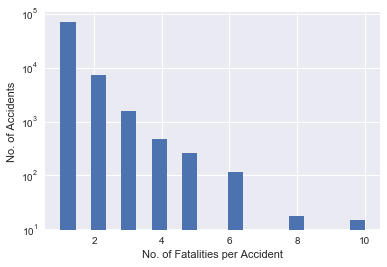

1     69811
2      7379
3      1539
4       478
5       264
6       115
8        18
10       15
Name: FATALS, dtype: int64
Total Serious Fatalities:  9808
Proportion of Serious Fatalities: 12.32 %


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Histogram of number of fatalities in each accident
fig, ax = plt.subplots()
ax.hist(traffic_clean['FATALS'], bins=20, log=True)
ax.set_xlabel("No. of Fatalities per Accident")
ax.set_ylabel("No. of Accidents")
plt.show()

fig.savefig('plots/fatal_hist.png')

#Counts of fatalities in accidents
print(traffic_clean['FATALS'].value_counts())

#Get total and proportion of serious fatalities (greater than 1 fatality)
total_serious = np.sum(traffic_clean['SERIOUS_FATALS'])
total_fatal = len(traffic_clean['FATALS'])

print("Total Serious Fatalities: ", total_serious)
print("Proportion of Serious Fatalities: {0:.2f}".format((total_serious/total_fatal) * 100),"%")

### Human Factors

The total number of drunk drivers involved in serious fatalities was 3,136. Drunk drivers were involved in 31.97% of serious fatalities.  There was usually only 1 drunk driver involved.  Occasionally there were 2 (243 accidents), but never more than 3 drunk drivers involved (7 accidents).  


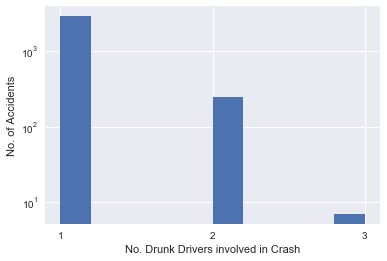

0    6672
1    2886
2     243
3       7
Name: DRUNK_DR, dtype: int64
Total Drunk Drivers Involved:  3136
Proportion of Serious Fatalities Involving Drunk Drivers: 31.97 %


In [45]:
#Histogram of drunk drivers involved in accidents with serious fatalities

drunk_drivers = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['DRUNK_DR'] > 0)]['DRUNK_DR']
drunk_all = traffic_clean[traffic_clean['SERIOUS_FATALS'] > 0]['DRUNK_DR']

fig, ax = plt.subplots()
ax.hist(drunk_drivers, bins=10, log=True)
ax.set_xlabel("No. Drunk Drivers involved in Crash")
ax.set_xticks([1, 2, 3])
ax.set_ylabel("No. of Accidents")
plt.show()

fig.savefig('plots/drunk_hist.png')

#Get counts and propotions of serious fatalities involving drunk driving
print(drunk_all.value_counts())

total_drunk_all = len(drunk_all)
total_drunk = len(drunk_drivers)
print("Total Drunk Drivers Involved: ", total_drunk)
print("Proportion of Serious Fatalities Involving Drunk Drivers: {0:.2f}".format((total_drunk/total_drunk_all) * 100),"%")



The total number of drug users involved in serious fatalities was 450.  Drug users were involved in 13.23% of serious fatalities.

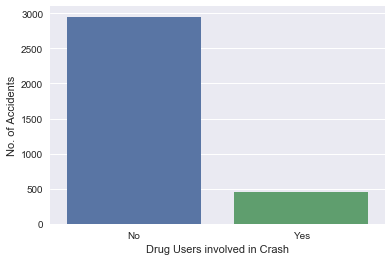

0    2952
1     450
Name: DRUGS, dtype: int64
Total Drug Users Involved:  450
Proportion of Serious Fatalities Involving Drug Users: 13.23 %


In [46]:
#Histogram of drug use in accidents with serious fatalities
#Excludes unknown and unreported instances
drugs = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['DRUGS'] != 8) & (traffic_clean['DRUGS'] != 9)]['DRUGS']

fig, ax = plt.subplots()
sns.countplot(x=drugs)
ax.set_xlabel("Drug Users involved in Crash")
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel("No. of Accidents")
plt.show()

fig.savefig('plots/drugs_hist.png')

#Get counts and proportions of serious fatalities involving drugs

print(drugs.value_counts())

total_drugs_all = len(drugs)
total_drugs = len(drugs[traffic_clean['DRUGS'] == 1])
print("Total Drug Users Involved: ", total_drugs)
print("Proportion of Serious Fatalities Involving Drug Users: {0:.2f}".format((total_drugs/total_drugs_all) * 100),"%")



As can be observed from the histogram below, the majority of the posted speed limits were highway speeds (approximately 60 m.p.h.) and most of the travel speeds were contained within this limit.  The number of accidents involving excess speed (over the posted limit) was 1,360 and accounted for 13.87% of serious fatalities. The average excess speed was  71 m.p.h.  The average amount by which the speed was in excess of the posted limit was  21 m.p.h.

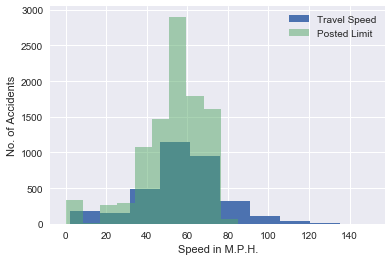

Number of Excess Speed cases:  1360
Percent of Serious Fatalities involving Excess Speed: 13.87 %
The average excess speed was  71 m.p.h.
The average amount by which the speed was in excess of the posted limit was  21 m.p.h.


In [47]:
#Histogram of speed and posted speed limits juxtaposed in accidents with serious fatalities

fig, ax = plt.subplots()
ax.hist(traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['TRAV_SP'] > 0)]['TRAV_SP'], label="Travel Speed")
ax.hist(traffic_clean[traffic_clean['SERIOUS_FATALS'] > 0]['VSPD_LIM'], alpha=0.5, label="Posted Limit")
ax.set_xlabel("Speed in M.P.H.")
ax.set_ylabel("No. of Accidents")
ax.legend()
plt.show()

fig.savefig('plots/speed_hist.png')

#Get counts and proportions of serious fatalities speeds exceeding posted speed limits
excess_speed = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM'])]['TRAV_SP']
percent_excess_speed = (len(excess_speed)/total_serious) * 100
posted_limit = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM'])]['VSPD_LIM']
diff_speed = excess_speed.subtract(posted_limit, fill_value=0) 
print("Number of Excess Speed cases: ", len(excess_speed))
print("Percent of Serious Fatalities involving Excess Speed: {0:.2f}".format(percent_excess_speed), "%")
print("The average excess speed was ", int(np.round(excess_speed.mean())), "m.p.h.")
print("The average amount by which the speed was in excess of the posted limit was ", int(np.round(diff_speed.mean())), "m.p.h.")



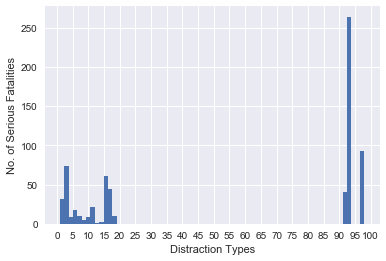

0     6629
93     264
98      93
3       73
17      44
92      40
15      37
1       31
Name: MDRDSTRD, dtype: int64
Legend: 

0 : Not Distracted
93 : Inattention (Inattentive), Details Unknown
98 : Other Distraction
3 : By Other Occupant(s)
17 : Distraction/Inattention
92 : Distraction (Distracted), Details Unknown
15 : Other Cellular Phone Related
1 : Looked But Did Not See


Total Distracted Drivers Involved:  690
Most common distraction:  93 , Inattention
Proportion of Serious Fatalities Involving Distracted Drivers: 7.04 %


In [48]:
#Histogram of driver distraction in accidents with serious fatalities
#Excludes unknown and unreported instances

distracted = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MDRDSTRD'] != 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96), 'MDRDSTRD']
distracted_all = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96), 'MDRDSTRD']

fig, ax = plt.subplots()
ax.hist(distracted, bins=70)

ax.set_xlabel("Distraction Types")
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
ax.set_ylabel("No. of Serious Fatalities")

plt.show()

fig.savefig('plots/distract_hist.png')

#Legend Print Function
def legend_print(dictionary):
    print("Legend: \n")
    for keys, values in dictionary.items():
        print(keys, ":", values)
    print("\n")    
    return

#Legend Dictionary
distr_dict = {0: "Not Distracted", 
             93: "Inattention (Inattentive), Details Unknown", 
             98: "Other Distraction", 
             3: "By Other Occupant(s)", 
             17: "Distraction/Inattention", 
             92: "Distraction (Distracted), Details Unknown",
             15: "Other Cellular Phone Related",
             1: "Looked But Did Not See"}

#Get counts and proportions of serious fatalities involving driver distraction

total_distracted = len(distracted)
total_distracted_all = len(distracted_all)
print(distracted_all.value_counts().head(8))
legend_print(distr_dict)
print("Total Distracted Drivers Involved: ", total_distracted)
print("Most common distraction: ", distracted.value_counts().index[0], ", Inattention")
print("Proportion of Serious Fatalities Involving Distracted Drivers: {0:.2f}".format((total_distracted/total_serious) * 100),"%")



The total number of accidents involving distracted drivers was 690 and accounted for 7.04% of serious fatalities. The most common distraction appeared to be general inattention, but the most common specific types of distractions were those resulting from other vehicle occupants (73/690 = 10.58% of distracted drivers) and from cell phone-related distractions (37/690 = 5.36% of distracted drivers).


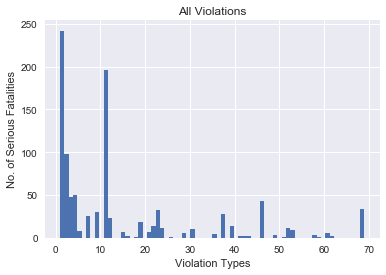

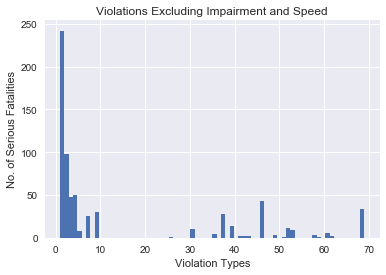

0     8443
1      242
11     196
2       98
72      50
Name: MVIOLATN, dtype: int64
1     242
2      98
4      50
3      48
46     43
dtype: int64
Legend: 

0 : None
1 : Manslaughter or Homicide
11 : Driving While Intoxicated (Alcohol or Drugs) or BAC above Limit
2 : Willful Reckless Driving; Driving to Endanger; Negligent Driving
72 : Other Driver License Violations
4 : Inattentive, Careless, Improper Driving
3 : Unsafe Reckless (Not Willful, Wanton Reckless) Driving
46 : Fail to Yield Generally


Total Violations of Motor Vehicle Law Involved:  993
Total Non-Impairment or Speed-Related Violations of Motor Vehicle Law Involved:  676
Most common violation:  1 , Manslaughter or Homicide
Proportion of Serious Fatalities Involving Violations of Motor Vehicle Law: 10.12 %
Proportion of Serious Fatalities Involving Non-Impairment or Speed-Related Violations: 6.89 %


In [49]:
#Histogram of violations of motor vehicle law in accidents with serious fatalities
#Excludes unknown and unreported instances

m_viol = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MVIOLATN'] > 0) & (traffic_clean['MVIOLATN'] < 71), 'MVIOLATN']
m_viol_all = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MVIOLATN'] != 99) & (traffic_clean['MVIOLATN'] != 97), 'MVIOLATN']

fig, ax = plt.subplots()

ax.hist(m_viol, bins=70)
ax.set_xlabel("Violation Types")
ax.set_ylabel("No. of Serious Fatalities")
ax.set_title("All Violations")
plt.show()

fig.savefig('plots/viol_hist.png')

#Get counts and proportions of serious fatalities involving violations of motor vehicle law
#Totals and proportions for all violations and violations excluding impairment and speed-related offenses (to avoid overlap with preceding variables)
total_m_viol = len(m_viol)
total_m_viol_all = len(m_viol_all)
impair_viol = [11, 12, 13, 14, 15, 16, 18, 19]
speed_viol = [21, 22, 23, 24, 25, 29]
other_viol = pd.Series([elem for elem in m_viol.values if elem not in impair_viol and elem not in speed_viol])
total_other_viol = len(other_viol)

fig2, ax2 = plt.subplots()
ax2.hist(other_viol, bins=70)
ax2.set_xlabel("Violation Types")
ax2.set_ylabel("No. of Serious Fatalities")
ax2.set_title("Violations Excluding Impairment and Speed")
plt.show()

fig2.savefig('plots/viol_other_hist.png')

#Legend Dictionary
viol_dict = {0: "None",
            1: "Manslaughter or Homicide",
            11: "Driving While Intoxicated (Alcohol or Drugs) or BAC above Limit",
            2: "Willful Reckless Driving; Driving to Endanger; Negligent Driving",
            72: "Other Driver License Violations",
            4: "Inattentive, Careless, Improper Driving",
            3: "Unsafe Reckless (Not Willful, Wanton Reckless) Driving",
            46: "Fail to Yield Generally"}

print(m_viol_all.value_counts().head())
print(other_viol.value_counts().head())
legend_print(viol_dict)
print("Total Violations of Motor Vehicle Law Involved: ", total_m_viol)
print("Total Non-Impairment or Speed-Related Violations of Motor Vehicle Law Involved: ", total_other_viol)
print("Most common violation: ", m_viol.value_counts().index[0], ", Manslaughter or Homicide")
print("Proportion of Serious Fatalities Involving Violations of Motor Vehicle Law: {0:.2f}".format((total_m_viol/total_serious) * 100),"%")
print("Proportion of Serious Fatalities Involving Non-Impairment or Speed-Related Violations: {0:.2f}".format((total_other_viol/total_serious) * 100),"%")


The total number of accidents in which drivers were charged with violations of motor vehicle law was 993 and accounted for just 10.12% of serious fatalities.  However, in order to avoid double counting of impairment-related and speed-related causes already discussed, I excluded these types of offenses and ran another count for other types of violations. The total number of accidents in which drivers were charged with non-impairment-related and non-speed-related violations of motor vehicle law was 676 and accounted for 6.89% of serious fatalities. The most common violation charged appeared to be Manslaughter or Homicide. Ironically, there did not appear to be many instances where charges were filed in accidents involving serious fatalities in 2015.  No charges were filed in 8,443 cases. Perhaps by filing charges where appropriate more frequently, it could serve as a deterrent to driver behaviors that lead to serious fatalities in the future. 

### Environmental Factors

The total number of accidents in which adverse weather conditions were involved was 2,759 and accounted for 28.13% of serious fatalities, where the most common type of adverse weather was cloudiness.  However, in most accidents involving serious fatalities the weather was clear (in 6,974 instances), which initially suggests that more often than not human agency (or lack thereof) is to blame for the accident. 


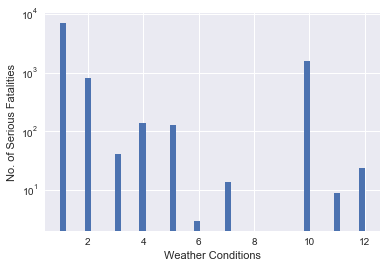

1     6974
10    1573
2      827
4      138
5      130
3       41
12      24
7       14
11       9
6        3
Name: WEATHER, dtype: int64
Legend: 

1 : Clear
10 : Cloudy
2 : Rain
4 : Snow
5 : Fog, Smog, Smoke
3 : Sleet, Hail
12 : Freezing Rain or Drizzle
7 : Blowing Sand, Soil, Dirt
11 : Blowing Snow
6 : Severe Crosswinds


Total Accidents where Adverse Weather Conditions Involved:  2759
Most common weather type in accidents with serious fatalities: 1 , Clear weather
Most common weather type in accidents involving adverse weather with serious fatalities: 10 , Cloudy
Proportion of Serious Fatalities Involving Adverse Weather Conditions: 28.13 %


In [50]:
#Histogram of weather conditions in accidents with serious fatalities
#Excludes unknown, undefined ("Other") and unreported instances

weather = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['WEATHER'] != 0) & (traffic_clean['WEATHER'] != 8) & (traffic_clean['WEATHER'] != 99) & (traffic_clean['WEATHER'] != 98), 'WEATHER']

fig, ax = plt.subplots()
ax.hist(weather, bins=50, log=True)
ax.set_xlabel("Weather Conditions")
ax.set_ylabel("No. of Serious Fatalities")
plt.show()

fig.savefig('plots/weather_hist.png')

#Legend Dictionary
weather_dict = {1: "Clear", 
               10: "Cloudy", 
               2: "Rain", 
               4: "Snow", 
               5: "Fog, Smog, Smoke", 
               3: "Sleet, Hail", 
               12: "Freezing Rain or Drizzle", 
               7: "Blowing Sand, Soil, Dirt", 
               11: "Blowing Snow",  
               6: "Severe Crosswinds"}

#Get counts and proportions of serious fatalities involving adverse weather conditions

bad_weather = weather[weather != 1]
total_bad_weather = len(bad_weather)
print(weather.value_counts())
legend_print(weather_dict)
print("Total Accidents where Adverse Weather Conditions Involved: ", total_bad_weather)
print("Most common weather type in accidents with serious fatalities:", weather.value_counts().index[0], ", Clear weather")
print("Most common weather type in accidents involving adverse weather with serious fatalities:", bad_weather.value_counts().index[0], ", Cloudy")

print("Proportion of Serious Fatalities Involving Adverse Weather Conditions: {0:.2f}".format((total_bad_weather/total_serious) * 100),"%")



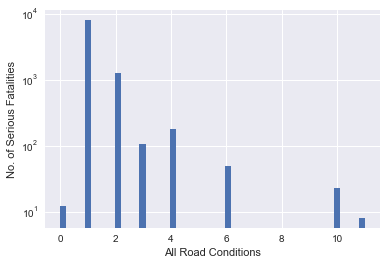

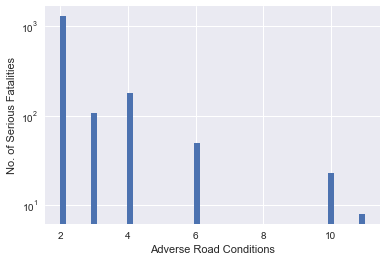

1     8027
2     1287
4      179
3      107
6       49
10      23
0       12
11       8
Name: VSURCOND, dtype: int64
Legend: 

1 : Dry
2 : Wet
4 : Ice/Frost
3 : Snow
6 : Water (Standing or Moving)
10 : Slush
0 : Non-Trafficway Area or Driveway Access
11 : Mud, Dirt, Gravel


Total Accidents where Adverse Road Conditions Involved:  1653
Most common road condition in accidents with serious fatalities: 1 , Dry
Most common road condition in accidents involving adverse road conditions with serious fatalities: 2 , Wet
Proportion of Serious Fatalities Involving Adverse Road Conditions: 16.85 %


In [51]:
#Histogram of road conditions in accidents with serious fatalities
#Excludes unknown, undefined ("Other") and unreported instances

roads = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['VSURCOND'] != 99) & (traffic_clean['VSURCOND'] != 8) &(traffic_clean['VSURCOND'] != 98), 'VSURCOND']
bad_roads = roads[(roads != 1) & (roads != 0)]

fig, ax = plt.subplots()
ax.hist(roads, bins=50, log=True)
ax.set_xlabel("All Road Conditions")
ax.set_ylabel("No. of Serious Fatalities")
plt.show()

fig.savefig('plots/roads_hist.png')

fig2, ax2 = plt.subplots()
ax2.hist(bad_roads, bins=50, log=True)
ax2.set_xlabel("Adverse Road Conditions")
ax2.set_ylabel("No. of Serious Fatalities")

plt.show()

fig2.savefig('plots/roads_adverse_hist.png')

#Legend Dictionary
roads_dict = {1: "Dry", 
             2: "Wet", 
             4: "Ice/Frost", 
             3: "Snow", 
             6: "Water (Standing or Moving)", 
             10: "Slush", 
             0: "Non-Trafficway Area or Driveway Access", 
             11: "Mud, Dirt, Gravel"}

#Get counts and proportions of serious fatalities involving adverse road conditions

total_bad_roads = len(bad_roads)
print(roads.value_counts())
legend_print(roads_dict)
print("Total Accidents where Adverse Road Conditions Involved: ", total_bad_roads)
print("Most common road condition in accidents with serious fatalities:", roads.value_counts().index[0], ", Dry")
print("Most common road condition in accidents involving adverse road conditions with serious fatalities:", bad_roads.value_counts().index[0], ", Wet")

print("Proportion of Serious Fatalities Involving Adverse Road Conditions: {0:.2f}".format((total_bad_roads/total_serious) * 100),"%")


The total number of accidents in which adverse road conditions were involved was 1,653 and accounted for 16.85% of serious fatalities, where the most common type of adverse road condition was wetness. However, just as with weather conditions discussed above, the majority of serious fatalities (8,027 instances) involved dry road conditions. This again suggests that human agency may be more at fault than environmental factors in causing serious fatalities. 


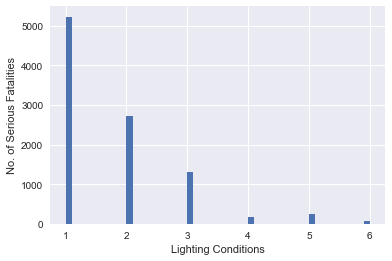

1    5234
2    2730
3    1317
5     253
4     182
6      70
Name: LGT_COND, dtype: int64
Legend: 

1 : Daylight
2 : Dark – Not Lighted
3 : Dark – Lighted
5 : Dusk
4 : Dawn
6 : Dark – Unknown Lighting


Total Accidents where Adverse Lighting Conditions Involved:  3235
Most common lighting condition in accidents with serious fatalities: 1 , Daylight
Most common adverse lighting condition in accidents with serious fatalities: 2 , Dark with no lighting
Proportion of Serious Fatalities Involving Adverse Lighting Conditions: 32.98 %


In [52]:
#Histogram of lighting conditions in accidents with serious fatalities

lighting = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['LGT_COND'] != 7) & (traffic_clean['LGT_COND'] != 8) & (traffic_clean['LGT_COND'] != 9), 'LGT_COND']

fig, ax = plt.subplots()
ax.hist(lighting, bins=50)
ax.set_xlabel("Lighting Conditions")
ax.set_ylabel("No. of Serious Fatalities")
plt.show()

fig.savefig('plots/light_hist.png')

#Legend Dictionary
light_dict = {1: "Daylight", 
             2: "Dark – Not Lighted", 
             3: "Dark – Lighted", 
             5: "Dusk", 
             4: "Dawn", 
             6: "Dark – Unknown Lighting"}


#Get counts and proportions of serious fatalities involving adverse lighting conditions

bad_lighting = lighting[(lighting != 1) & (lighting != 3)]
total_bad_lighting = len(bad_lighting)
print(lighting.value_counts())
legend_print(light_dict)
print("Total Accidents where Adverse Lighting Conditions Involved: ", total_bad_lighting)
print("Most common lighting condition in accidents with serious fatalities:", lighting.value_counts().index[0], ", Daylight")
print("Most common adverse lighting condition in accidents with serious fatalities:", bad_lighting.value_counts().index[0], ", Dark with no lighting")

print("Proportion of Serious Fatalities Involving Adverse Lighting Conditions: {0:.2f}".format((total_bad_lighting/total_serious) * 100),"%")


The total number of accidents in which adverse lighting conditions were involved was 3,235 and accounted for 32.98% of serious fatalities, where the most common type of adverse lighting condition was darkness with no or inadequate lighting.  Again, however, there were daylight conditions in most serious fatalities (5,234 instances). 


## Conclusions and Summary

In order to truly get a sense of the degree to which human-related causes or environmental causes were more at fault in serious fatalities, I filtered the SERIOUS_FATALS variable for human-related factors with affirmative (causative) conditions, as done for the analyses of these variables given above, and environmental variables with favorable conditions (clear skies, dry roads, daylight or well-lit conditions). I used the foregoing filtering followed by a count to create a new variable called **human_not_env**. I then performed the same filtering, but without specifying conditions for the environmental variable, to create a second variable called **mixed_causes**.  I then obtained the proportion of solely human-caused accidents by dividing **human_not_env** by the total number of SERIOUS_FATALS. To obtain the proportion of causes solely due to environmental factors, I subtracted **mixed_causes** from the total_number of SERIOUS_FATALS and divided by the total_number of SERIOUS_FATALS. Finally, to obtain the proportion of causes due a combination of human and environmental causes, I subtracted **human_not_env** from **mixed_causes** (since the exclusive case was subsumed within this variable) to get the number of mixed causes and divided by the total_number of SERIOUS_FATALS. The results were as follows:

In [53]:
#Get overall percentage of human and enironment-caused factors

human_not_env = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & 
                  ((traffic_clean['DRUNK_DR'] >0) | (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM']) |
                   (traffic_clean['REST_USE'] == 7) | (traffic_clean['REST_MIS'] == 1) | 
                   (traffic_clean['DRUGS'] == 1) | ((traffic_clean['MDRDSTRD'] != 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96)) | 
                  (traffic_clean['MDRMANAV'] < 95) | ((traffic_clean['MVIOLATN'] > 0) & (traffic_clean['MVIOLATN'] < 71))
                  ) & ((traffic_clean['WEATHER'] <= 1) & (traffic_clean['VSURCOND'] == 1) & 
                      ((traffic_clean['LGT_COND'] == 1) | (traffic_clean['LGT_COND'] == 3)) & 
                      (traffic_clean['WRK_ZONE'] == 0) & (traffic_clean['HAZ_INV'] == 1))]['SERIOUS_FATALS'].count()

mixed_causes = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & 
                  ((traffic_clean['DRUNK_DR'] >0) | (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM']) |
                   (traffic_clean['REST_USE'] == 7) | (traffic_clean['REST_MIS'] == 1) | 
                   (traffic_clean['DRUGS'] == 1) | ((traffic_clean['MDRDSTRD'] != 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96)) | 
                  (traffic_clean['MDRMANAV'] < 95) | ((traffic_clean['MVIOLATN'] > 0) & (traffic_clean['MVIOLATN'] < 71))
                  )]['SERIOUS_FATALS'].count()

print("Proportion of Solely Human-Caused Serious Fatalities: {0:.2f}".format((human_not_env/total_serious) * 100),"%")
print("Proportion of Solely Environment-Related Serious Fatalities: {0:.2f}".format(((total_serious - mixed_causes)/total_serious) * 100),"%")
print("Proportion of Combined Human and Environment-Caused Serious Fatalities: {0:.2f}".format(((mixed_causes - human_not_env)/total_serious) * 100),"%")


Proportion of Solely Human-Caused Serious Fatalities: 35.59 %
Proportion of Solely Environment-Related Serious Fatalities: 20.58 %
Proportion of Combined Human and Environment-Caused Serious Fatalities: 43.83 %


Thus, it appears that in the majority of cases there is a shared combination of human and environment-related causes acting simultaneously to bring about serious fatalities, but where only one or the other factor is solely present, human-related factors are more often than not to blame. These ideas will be further put to the test in my Machine Learning Analysis report. 
